In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philchodrow/Documents/teaching/ml-notes/source':
  os.chdir(r'/Users/philchodrow/Documents/teaching/ml-notes/source')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap_external.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/codecs.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/aliases.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/__init__.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/utf_8.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/latin_1.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/abc.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/io.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/stat.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3

/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_98242/1729260914.py:24: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#| echo: false
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
from sklearn.datasets import make_moons, make_circles
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np

In [4]:
#| echo: false
plt.style.use('seaborn-v0_8-whitegrid')
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

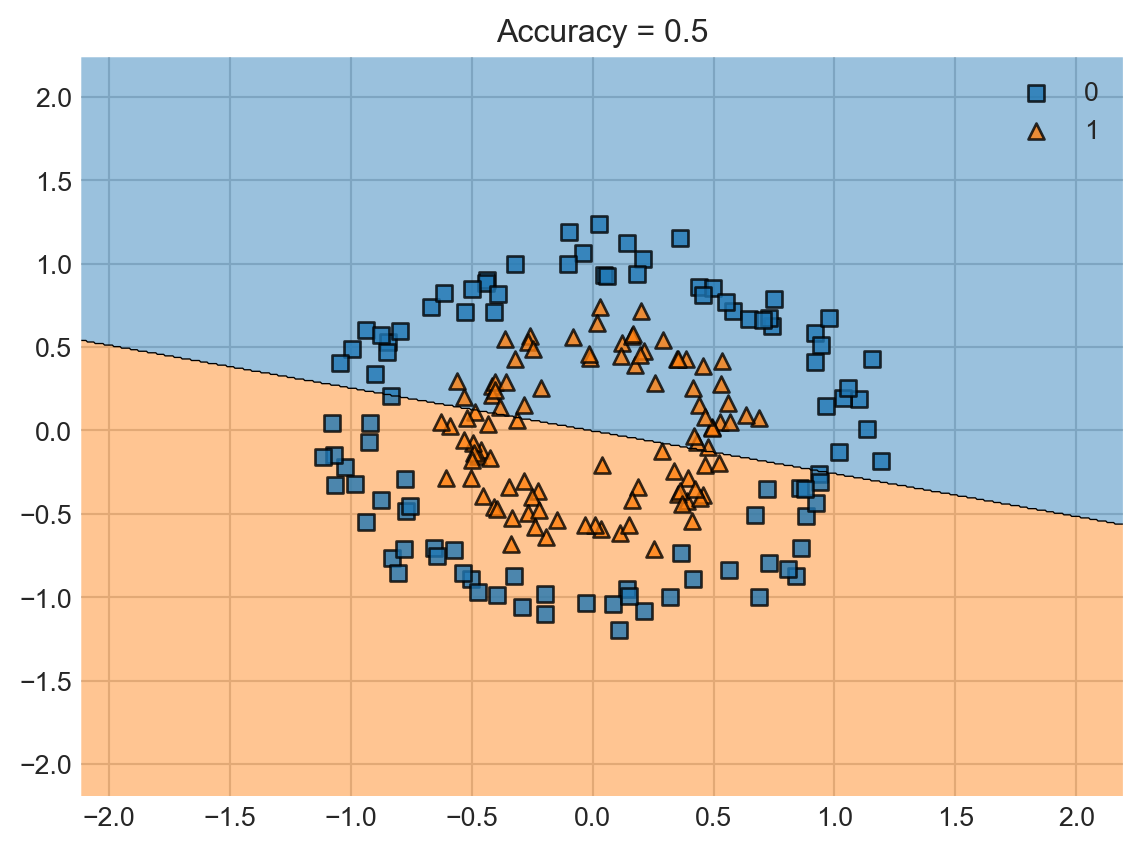

In [5]:
X, y = make_circles(200, shuffle = True, noise = 0.1, factor = 0.5)

LR = LogisticRegression()
LR.fit(X, y)
plot_decision_regions(X, y, clf = LR)
score = plt.gca().set_title(f"Accuracy = {LR.score(X, y)}")

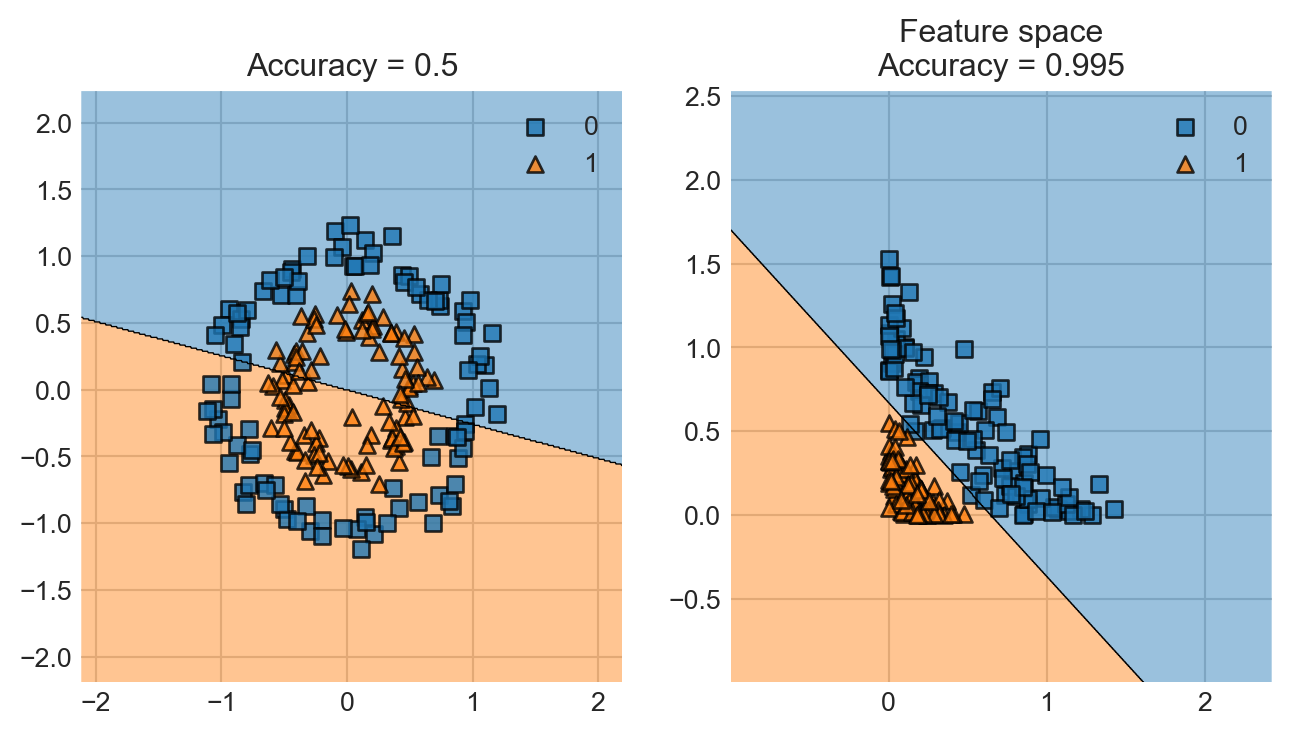

In [6]:
fig, axarr = plt.subplots(1, 2, figsize=(8, 4))

plot_decision_regions(X, y, clf = LR, ax = axarr[0])
score = axarr[0].set_title(f"Accuracy = {LR.score(X, y)}")

LR2 = LogisticRegression()

X_ = X**2
LR2.fit(X_, y)
plot_decision_regions(X_, y, clf = LR2, ax = axarr[1])
score = axarr[1].set_title(f"Feature space\nAccuracy = {LR2.score(X_, y)}")

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def poly_LR(degree, **kwargs):
    plr = Pipeline([("poly", PolynomialFeatures(degree = degree)),
                    ("LR", LogisticRegression(**kwargs))])
    return plr

def viz_plr(plr, X, y):  
    plot_decision_regions(X, y, clf = plr)
    score = plt.gca().set_title(f"Training Accuracy = {plr.score(X, y)}")  

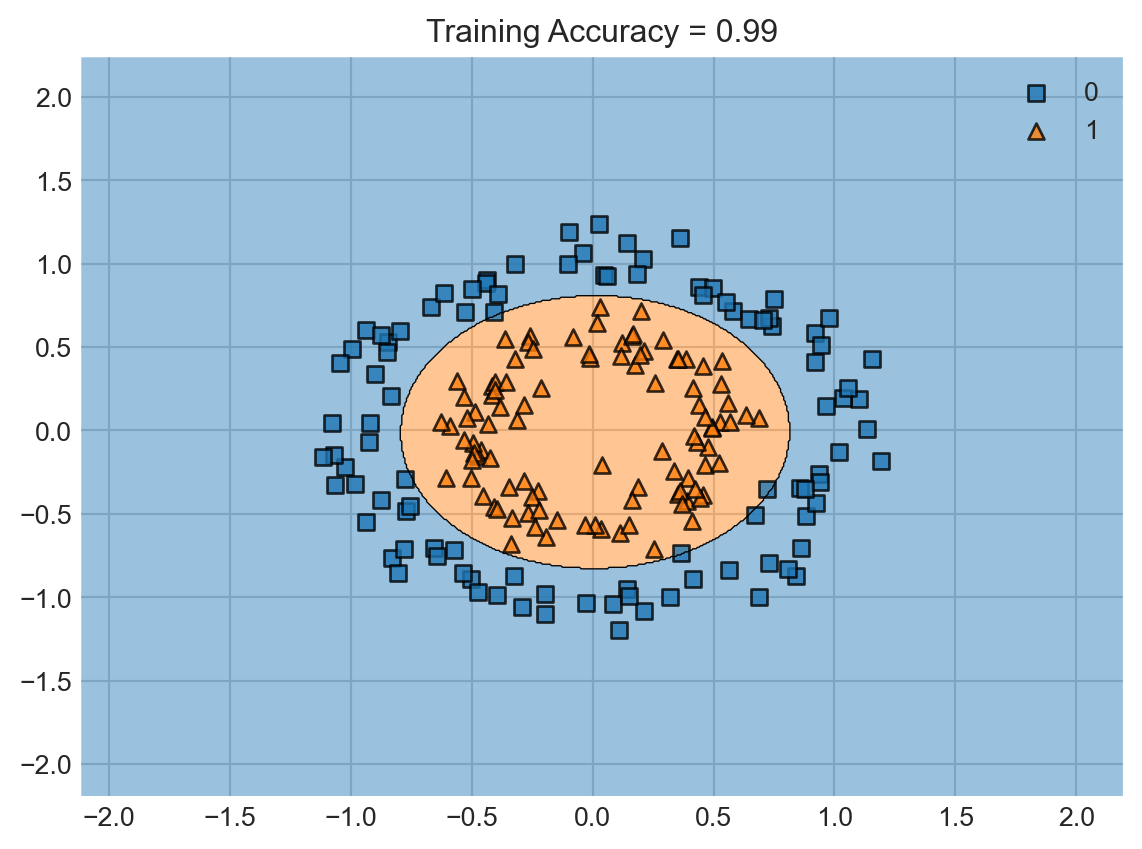

In [8]:
plr = poly_LR(degree = 2)
plr.fit(X, y)
viz_plr(plr, X, y)

In [9]:
plr.named_steps["LR"].coef_.round(2)

array([[-0.  ,  0.1 , -0.09, -4.85,  0.06, -4.69]])

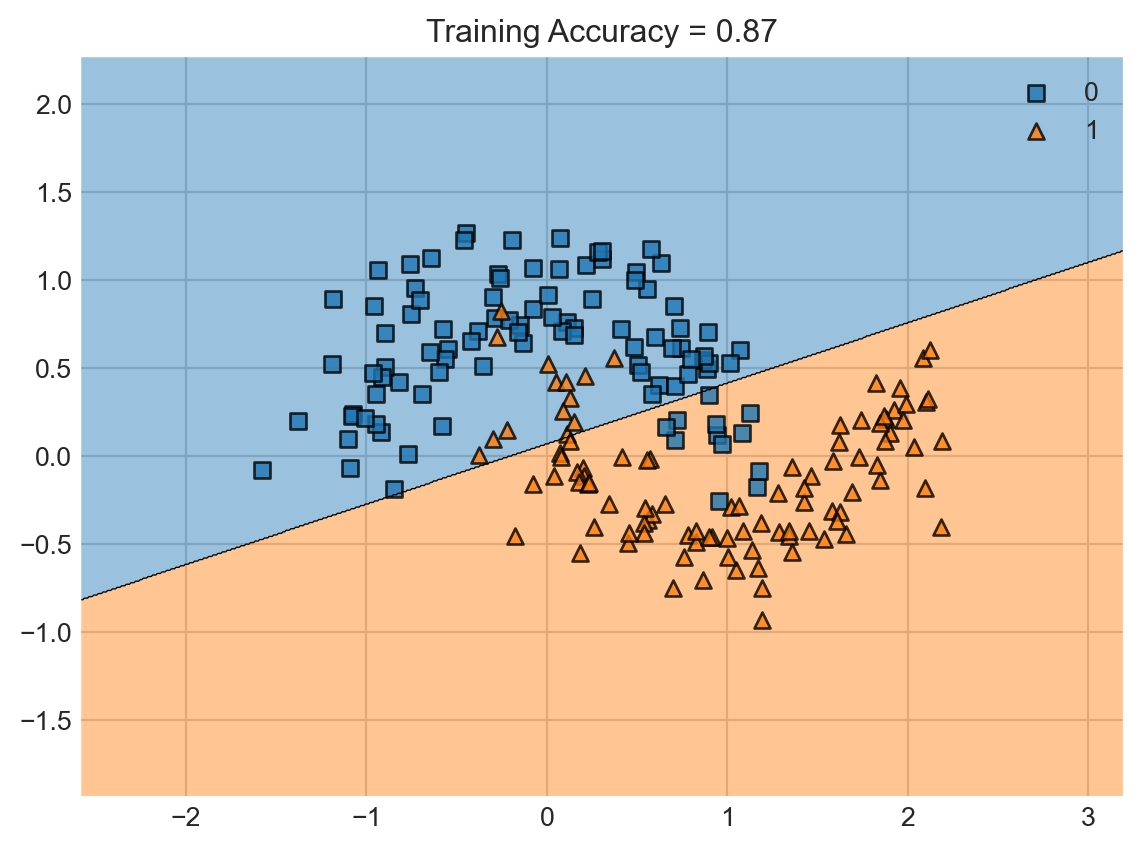

In [10]:
np.random.seed(123)
X, y = make_moons(200, shuffle = True, noise = 0.2)

plr = poly_LR(degree = 1)
plr.fit(X, y)
viz_plr(plr, X, y)

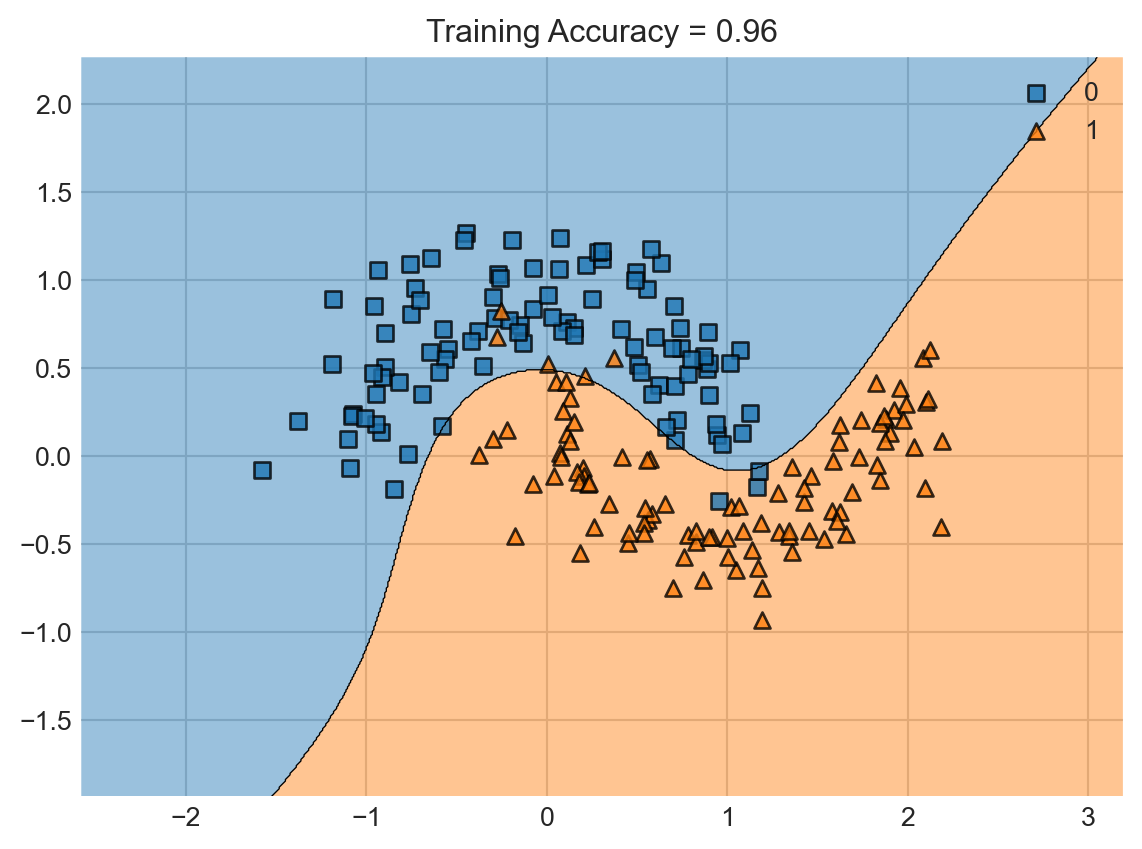

In [11]:
plr = poly_LR(degree = 5)
plr.fit(X, y)
viz_plr(plr, X, y)

In [12]:
plr.named_steps["LR"].coef_.round(2)

array([[-0.  ,  0.14, -2.51, -2.6 , -0.83, -0.63, -0.12, -1.26,  0.2 ,
        -0.95, -0.89, -0.57, -0.13, -0.22, -0.47,  1.48, -0.72,  0.19,
        -0.32,  0.01, -0.5 ]])

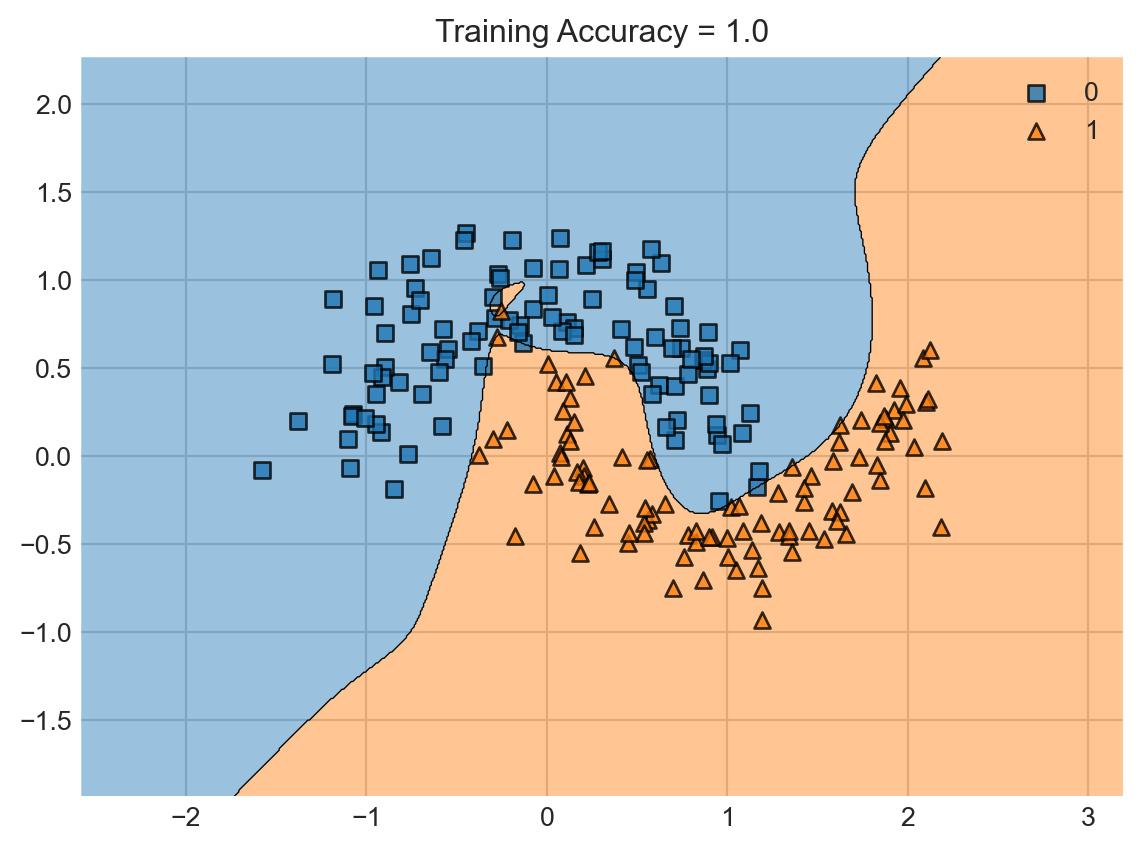

In [13]:
plr = poly_LR(degree = 15, penalty = "none", max_iter = 1000000)
plr.fit(X, y)
viz_plr(plr, X, y)

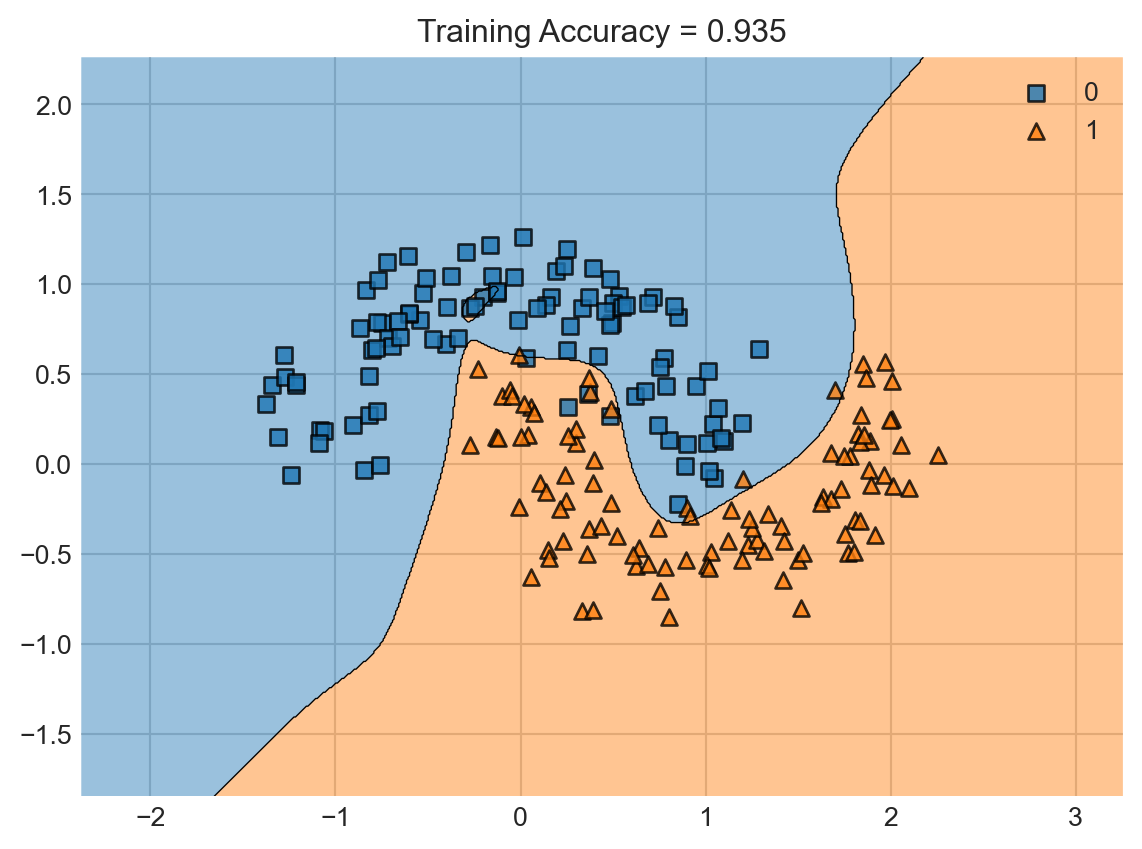

In [14]:
X, y = make_moons(200, shuffle = True, noise = 0.2)
viz_plr(plr, X, y)

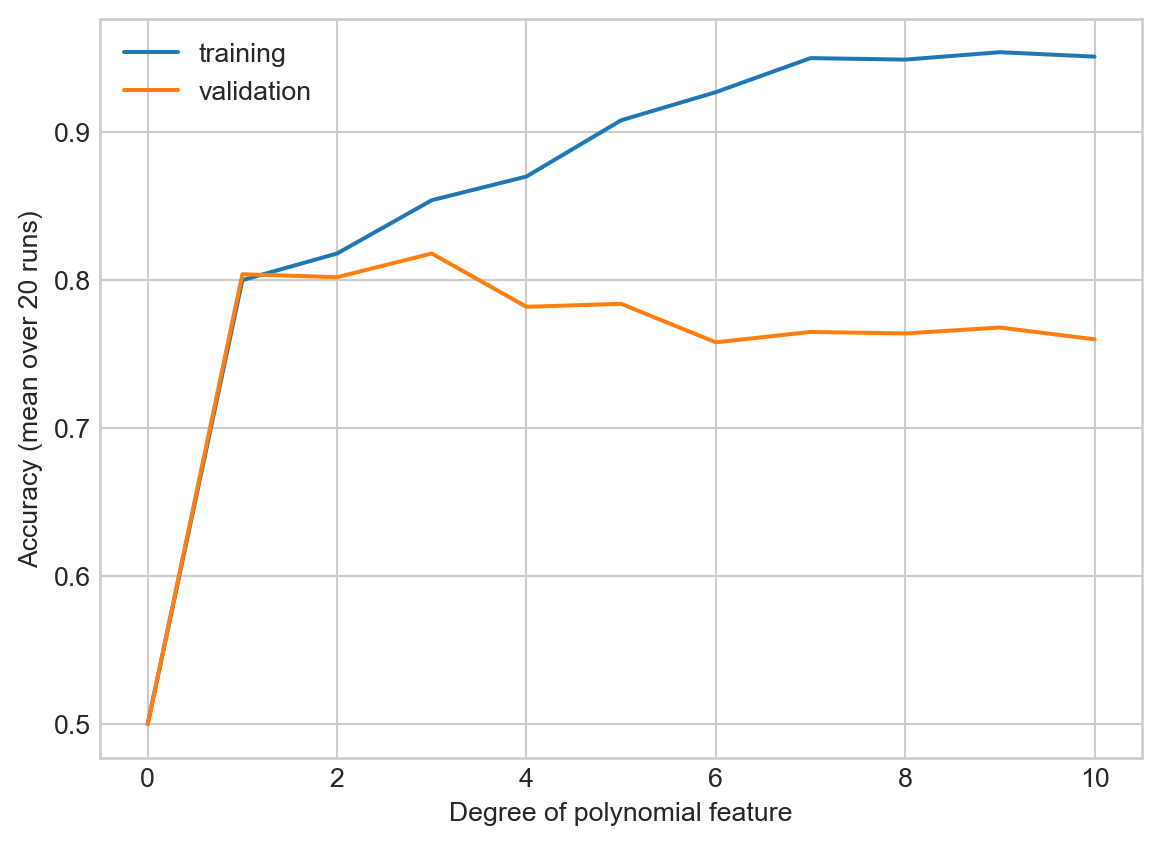

In [15]:
import pandas as pd
np.random.seed()

degs = range(0, 11)

df = pd.DataFrame({"deg": [], "train" : [], "test" : []})

for rep in range(10):
    X_train, y_train = make_moons(100, shuffle = True, noise = .4)
    X_test, y_test = make_moons(100, shuffle = True, noise = .4)

    for deg in degs:
        plr = poly_LR(degree = deg, penalty = "none", max_iter = int(1e3))
        plr.fit(X_train, y_train)
        to_add = pd.DataFrame({"deg" : [deg],
                               "train" : [plr.score(X_train, y_train)],
                               "test" : [plr.score(X_test, y_test)]})

        df = pd.concat((df, to_add))

        
means = df.groupby("deg").mean().reset_index()

plt.plot(means["deg"], means["train"], label = "training")
plt.plot(means["deg"], means["test"], label = "validation")
plt.legend()
labs = plt.gca().set(xlabel = "Degree of polynomial feature",
              ylabel = "Accuracy (mean over 20 runs)")

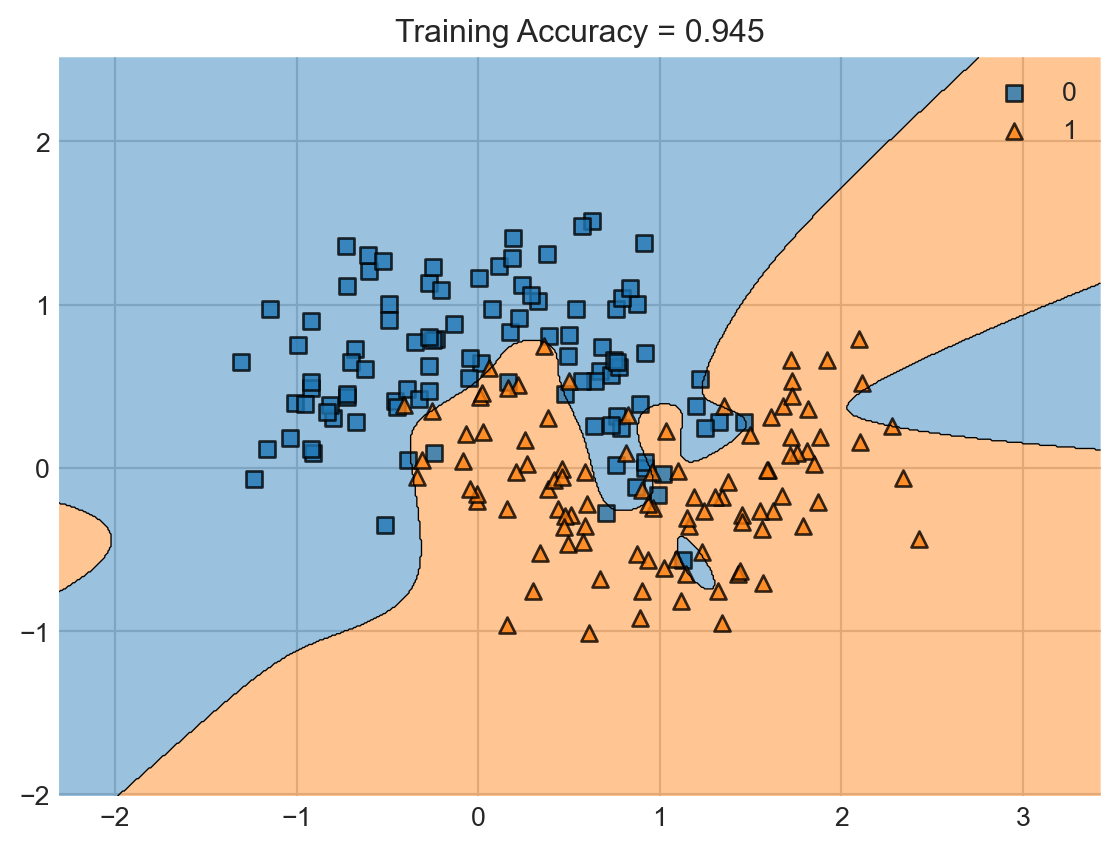

In [16]:
X, y = make_moons(200, shuffle = True, noise = .3)

plr = poly_LR(degree = 15, penalty = "none", max_iter = int(1e5))

plr.fit(X, y)
viz_plr(plr, X, y)

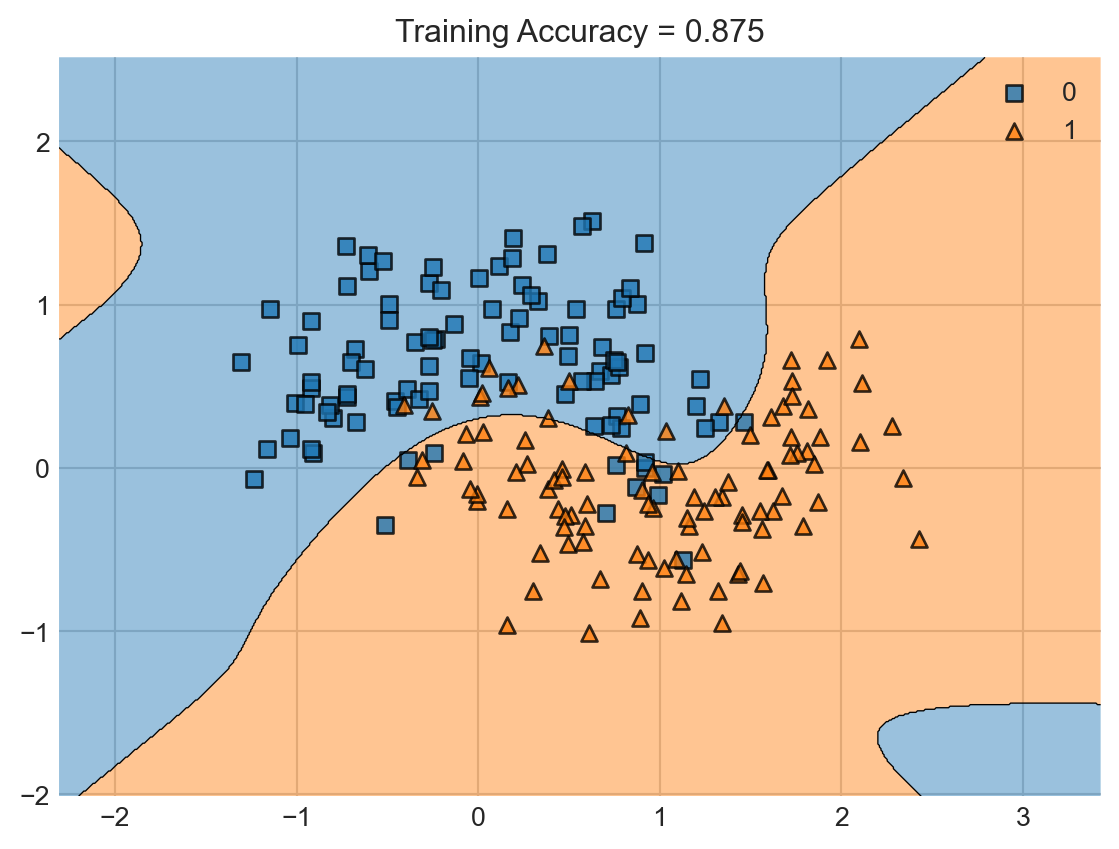

In [17]:
plr = poly_LR(degree = 15, penalty = "l1", solver = "liblinear", C = 1)

plr.fit(X, y)
viz_plr(plr, X, y)

In [18]:
plr.named_steps["LR"].coef_.round(2)

array([[ 0.54,  0.8 , -3.14, -1.99,  0.  , -0.03,  0.11, -0.61,  0.  ,
        -0.45, -0.05,  0.  ,  0.  ,  0.  ,  0.  ,  0.18,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.06,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.02, -0.03,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.01, -0.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.01, -0.02,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.01,  0.  , -0.  , -0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.  ,
      

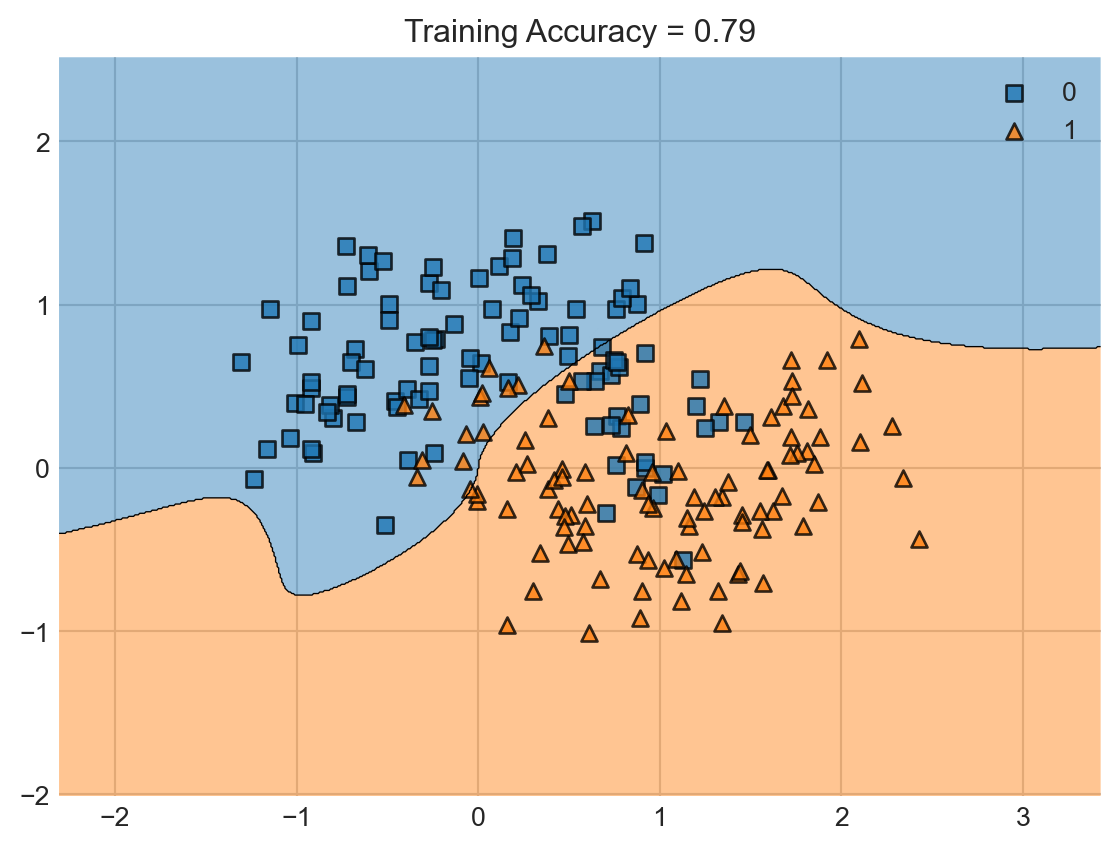

In [19]:
plr = poly_LR(degree = 15, penalty = "l1", solver = "liblinear", C = 0.01)

plr.fit(X, y)
viz_plr(plr, X, y)

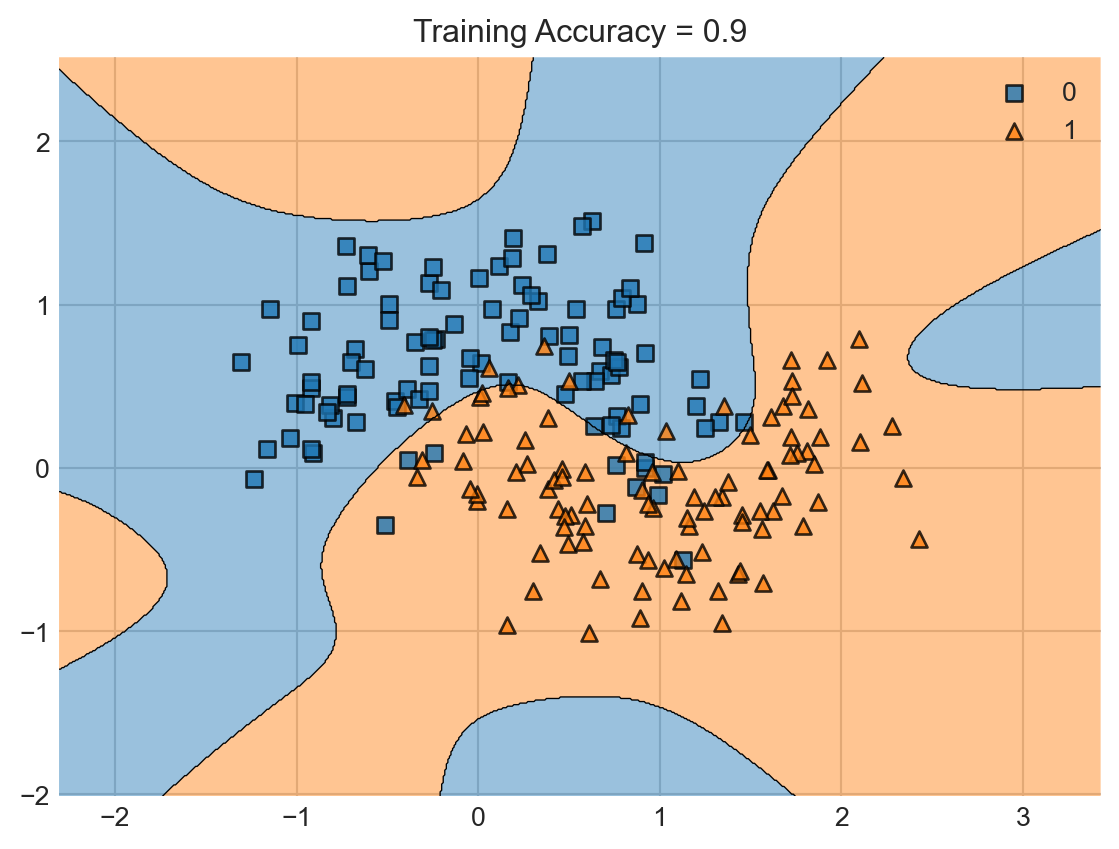

In [20]:
plr = poly_LR(degree = 15, penalty = "l1", solver = "liblinear", C = 100)

plr.fit(X, y)
viz_plr(plr, X, y)

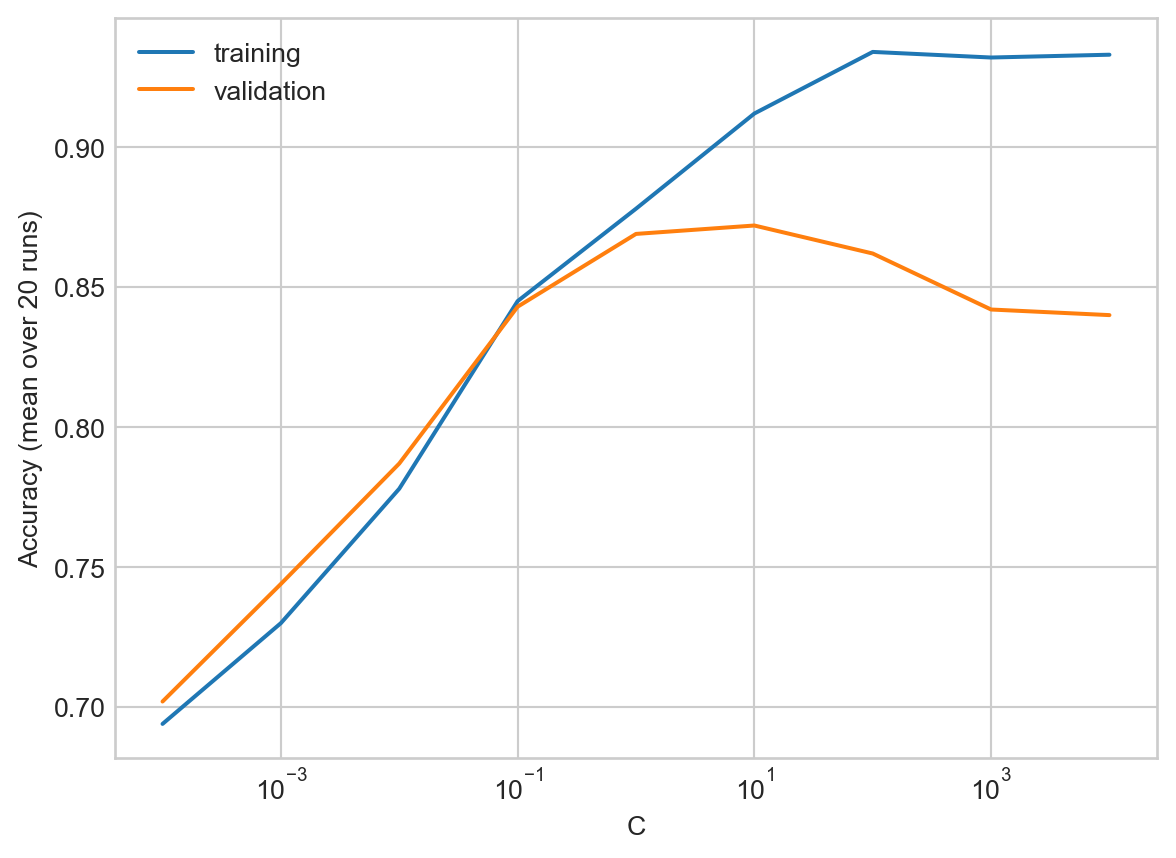

In [21]:
np.random.seed()

C = 10.0**np.arange(-4, 5)

df = pd.DataFrame({"C": [], "train" : [], "test" : []})

for rep in range(10):
    X_train, y_train = make_moons(100, shuffle = True, noise = .3)
    X_test, y_test = make_moons(100, shuffle = True, noise = .3)

    for c in C:
        plr = poly_LR(degree = 15, penalty = "l1", solver = "liblinear", C = c)

        plr.fit(X_train, y_train)

        to_add = pd.DataFrame({"C" : [c],
                               "train" : [plr.score(X_train, y_train)],
                               "test" : [plr.score(X_test, y_test)]})

        df = pd.concat((df, to_add))
     
means = df.groupby("C").mean().reset_index()

plt.plot(means["C"], means["train"], label = "training")
plt.plot(means["C"], means["test"], label = "validation")
plt.semilogx()
plt.legend()
labs = plt.gca().set(xlabel = "C",
              ylabel = "Accuracy (mean over 20 runs)")